<a href="https://colab.research.google.com/github/sakshisubedi/CSE_256_NLP/blob/main/knn/ag_news_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/CSE_256_Project

/content/drive/MyDrive/CSE_256_Project


In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [4]:
df_train = pd.read_csv("./aig_dataset/train.csv")
df_test = pd.read_csv("./aig_dataset/test.csv")

In [5]:
df_train.head()

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [6]:
df_test.head()

,Class Index,Title,Description
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...


In [7]:
import re

def clean_text_function(text):
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z]', ' ', text)

    # Convert text to lowercase
    text = text.lower()

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text)

    return text


In [8]:
df_train['text'] = df_train['Title'] + df_train['Description']
df_test['text'] = df_test['Title'] + df_test['Description']

In [9]:
df_train['text'] = df_train['text'].apply(lambda x: clean_text_function(x))
df_test['text'] = df_test['text'].apply(lambda x: clean_text_function(x))

In [10]:
df_train.head()

,Class Index,Title,Description,text
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",wall st bears claw back into the black reuters...
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,carlyle looks toward commercial aerospace reut...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,oil and economy cloud stocks outlook reuters r...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,iraq halts oil exports from main southern pipe...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...",oil prices soar to all time record posing new ...


In [11]:
# Apply TF-IDF vectorization
vectorizer = TfidfVectorizer()
X_train_transform = vectorizer.fit_transform(df_train['text'])
X_test_transform = vectorizer.transform(df_test['text'])

In [12]:
import time

# Start the timer
start_time = time.time()

In [13]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

In [14]:
execution_time = time.time() - start_time
execution_time

0.01110982894897461

In [15]:
classifier.fit(X_train_transform, df_train['Class Index'])

KNeighborsClassifier()

In [16]:
y_pred = classifier.predict(X_test_transform)

In [17]:
accuracy = accuracy_score(df_test['Class Index'], y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9003947368421052


In [18]:
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(df_test['Class Index'], y_pred)
confusion_mat

array([[1706,   64,   86,   44],
       [  26, 1848,   14,   12],
       [  79,   24, 1635,  162],
       [  79,   23,  144, 1654]])

Text(0.5, 1.0, 'Confusion Matrix')

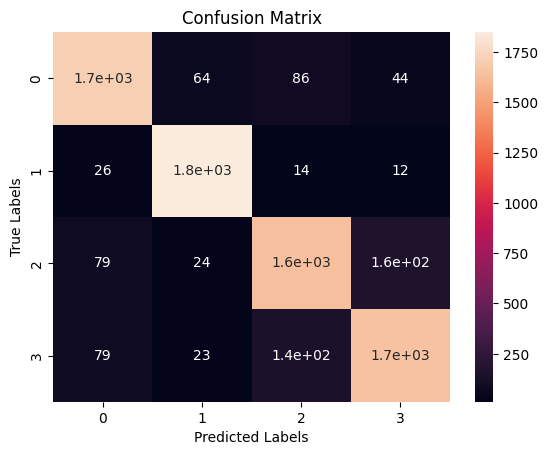

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_mat, annot=True)
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.title('Confusion Matrix')

In [20]:
# Calculate class-wise accuracy
import numpy as np
class_accuracy = np.diagonal(confusion_mat) / np.sum(confusion_mat, axis=1)
print("class-wise accuracy")
class_accuracy

class-wise accuracy


array([0.89789474, 0.97263158, 0.86052632, 0.87052632])

In [21]:
# Identify misclassified instances
num_classes = len(confusion_mat)

misclassified_instances = []

for i in range(num_classes):
    for j in range(num_classes):
        if i != j and confusion_mat[i, j] > 0:
            misclassified_instances.append((i, j, confusion_mat[i, j]))
misclassified_instances

[(0, 1, 64),
 (0, 2, 86),
 (0, 3, 44),
 (1, 0, 26),
 (1, 2, 14),
 (1, 3, 12),
 (2, 0, 79),
 (2, 1, 24),
 (2, 3, 162),
 (3, 0, 79),
 (3, 1, 23),
 (3, 2, 144)]

In [22]:
# printing misclassified data
wrong_predictions = 0
for idx, _ in enumerate(y_pred):
  if df_test.iloc[idx]['Class Index'] != y_pred[idx]:
    print(df_test.iloc[idx]['text'] + "\n\n")
    wrong_predictions += 1

prediction unit helps forecast wildfires ap ap it s barely dawn when mike fitzpatrick starts his shift with a blur of colorful maps figures and endless charts but already he knows what the day will bring lightning will strike in places he expects winds will pick up moist places will dry and flames will roar 


open letter against british copyright indoctrination in schoolsthe british department for education and skills dfes recently launched a music manifesto campaign with the ostensible intention of educating the next generation of british musicians unfortunately they also teamed up with the music industry emi and various artists to make this popular emi has apparently negotiated their end well so that children in our schools will now be indoctrinated about the illegality of downloading music the ignorance and audacity of this got to me a little so i wrote an open letter to the dfes about it unfortunately it s pedantic as i suppose you have to be when writing to goverment representati

In [23]:
# printing wrong predictions
wrong_predictions

757

In [24]:
# common misclassification
common_misclassifications = sorted(misclassified_instances, key=lambda x: x[2], reverse=True)
common_misclassifications

[(2, 3, 162),
 (3, 2, 144),
 (0, 2, 86),
 (2, 0, 79),
 (3, 0, 79),
 (0, 1, 64),
 (0, 3, 44),
 (1, 0, 26),
 (2, 1, 24),
 (3, 1, 23),
 (1, 2, 14),
 (1, 3, 12)]

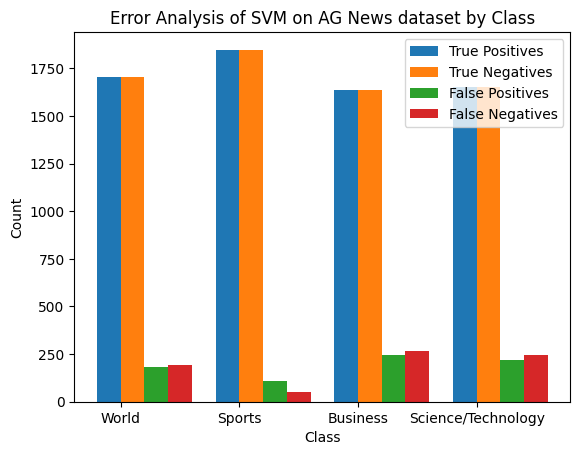

In [25]:
true_positives = np.diag(confusion_mat)
true_negatives = np.sum(confusion_mat) - np.sum(confusion_mat, axis=(0, 1)) + true_positives
false_positives = np.sum(confusion_mat, axis=0) - true_positives
false_negatives = np.sum(confusion_mat, axis=1) - true_positives

# Set the labels for x-axis
labels = ['World', 'Sports', 'Business', 'Science/Technology']

# Create the bar plot
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, true_positives, width, label='True Positives')
rects2 = ax.bar(x + width/2, true_negatives, width, label='True Negatives')
rects3 = ax.bar(x + width*1.5, false_positives, width, label='False Positives')
rects4 = ax.bar(x + width*2.5, false_negatives, width, label='False Negatives')

# Set plot title, legend, and axis labels
ax.set_title('Error Analysis of SVM on AG News dataset by Class')
ax.set_xlabel('Class')
ax.set_ylabel('Count')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()